In [1]:
import numpy as np
import matplotlib.pyplot as plt

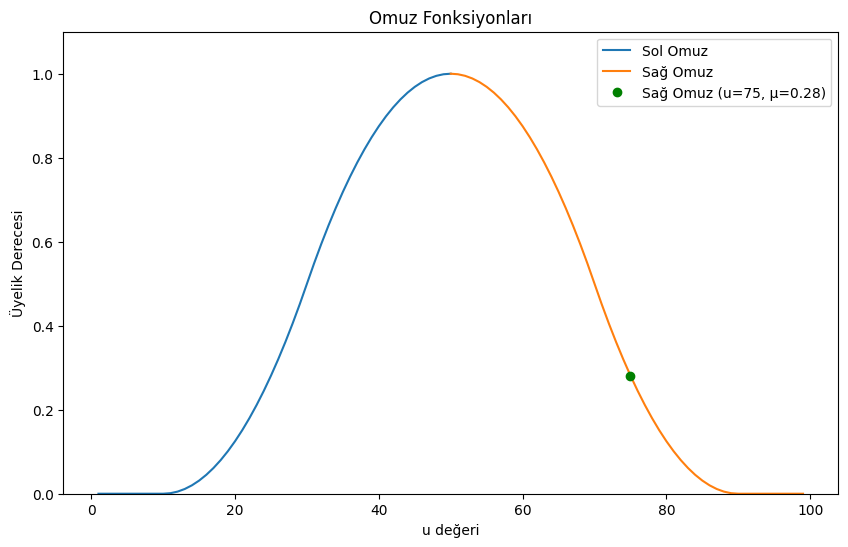

In [2]:
"""
Odev 3: PI fonksiyonu cizimi 
"""
def uyelik_hesapla(a, b, c, u):
    """
    a: başlangiç noktasi
    b: orta nokta
    c: bitiş noktas
    u: hesaplanacak nokta
    """
    # Sol omuz hesaplama
    if u <= c:
        if u < a:
            sol_deger = 0
        elif a <= u <= b:
            sol_deger = 2 * ((u - a) / (c - a))**2
        elif b < u <= c:
            sol_deger = 1 - 2 * ((u - c) / (c - a))**2
        else:
            sol_deger = 1
    else:
        sol_deger = 1

    # Sağ omuz hesaplama
    if u >= a:
        if u > c:
            sag_deger = 0
        elif a <= u <= b:
            sag_deger = 1 - 2 * ((u - a) / (c - a))**2
        elif b < u <= c:
            sag_deger = 2 * ((u - c) / (c - a))**2
        else:
            sag_deger = 1
    else:
        sag_deger = 1

    return sol_deger, sag_deger

def omuz_grafik_ciz(b_genislik=40, c_orta_nokta=50, test_u=None):
    x = np.arange(1, 100, 1)
    x_sol = x[x <= c_orta_nokta]
    x_sag = x[x >= c_orta_nokta]
    
    y_sol = []
    y_sag = []
    
    # Parametreleri hesapla
    a_sol = c_orta_nokta - b_genislik
    b_sol = c_orta_nokta - b_genislik / 2
    c_sol = c_orta_nokta

    a_sag = c_orta_nokta
    b_sag = c_orta_nokta + b_genislik / 2
    c_sag = c_orta_nokta + b_genislik

    # Sol omuz hesaplama
    for u in x_sol:
        sol, _ = uyelik_hesapla(a_sol, b_sol, c_sol, u)
        y_sol.append(sol)

    # Sağ omuz hesaplama
    for u in x_sag:
        _, sag = uyelik_hesapla(a_sag, b_sag, c_sag, u)
        y_sag.append(sag)

    # Grafikleri çizdirme
    plt.figure(figsize=(10, 6))
    plt.plot(x_sol, y_sol, label='Sol Omuz')
    plt.plot(x_sag, y_sag, label='Sağ Omuz')

    if test_u <= c_orta_nokta:
        sol_test, _ = uyelik_hesapla(a_sol, b_sol, c_sol, test_u)
        plt.plot(test_u, sol_test, 'ro', label=f'Sol Omuz (u={test_u}, μ={sol_test:.2f})')
    if test_u >= c_orta_nokta:
        _, sag_test = uyelik_hesapla(a_sag, b_sag, c_sag, test_u)
        plt.plot(test_u, sag_test, 'go', label=f'Sağ Omuz (u={test_u}, μ={sag_test:.2f})')

    plt.legend()
    plt.title('Omuz Fonksiyonları')
    plt.xlabel('u değeri')
    plt.ylabel('Üyelik Derecesi')
    plt.ylim(0, 1.1)
    plt.show()

# Fonksiyonu test etme
omuz_grafik_ciz(b_genislik=40, c_orta_nokta=50, test_u=75)

In [4]:
"""
Odev 3: Üçgen ve Yamuk üyelik fonksiyonlarini cizimi
"""
def ucgen_uyelik_hesapla(a, b, c, u):
    """
    a: başlangiç noktasi
    b: zirve (1)
    c: bitiş noktasi
    u: hesaplanacak nokta
    """
    if u <= a or u >= c:
        return 0
    elif a < u and u < b:
        return (u - a) / (b - a)
    elif b <= u and u < c:
        return (c - u) / (c - b)
    return 0

def yamuk_uyelik_hesapla(a, b, c, d, u):
    """
    a: başlangic noktasi (0)
    b: düzleşmeye baslanan nokta (1)
    c: düzlüğün bitisi (1)
    d: bitiş noktasi (0)
    u: hesaplanacak nokta
    """
    if u <= a or u >= d:
        return 0
    elif a < u and u < b:
        return (u - a) / (b - a)
    elif b <= u and u <= c:
        return 1
    elif c < u and u < d:
        return (d - u) / (d - c)
    return 0

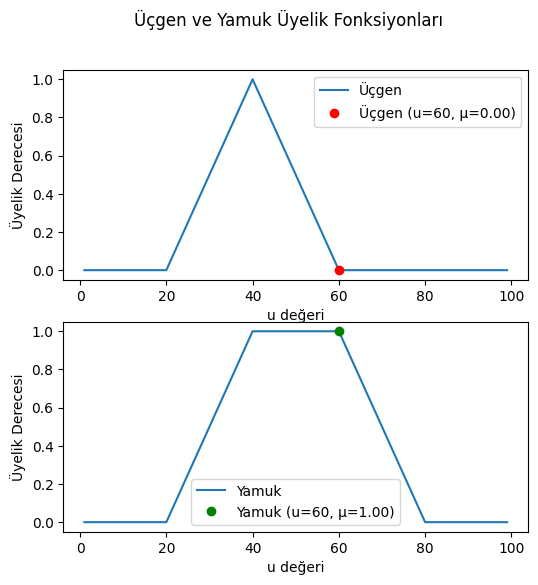

In [5]:
def grafik_ucgen_yamuk_ciz(a, b, c, d, test_u):
    x = np.arange(1, 100, 1)
    y_ucgen = [ucgen_uyelik_hesapla(a, b, c, u) for u in x]
    y_yamuk = [yamuk_uyelik_hesapla(a, b, c, d, u) for u in x]

    
    fig, axs = plt.subplots(2, figsize=(6, 6))
    fig.suptitle('Üçgen ve Yamuk Üyelik Fonksiyonları')
    axs[0].plot(x, y_ucgen, label='Üçgen')
    axs[1].plot(x, y_yamuk, label='Yamuk')

    # Test noktalarını çizdirme
    ucgen_test = ucgen_uyelik_hesapla(a, b, c, test_u)
    # ro -> red circle
    axs[0].plot(test_u, ucgen_test, 'ro', label=f'Üçgen (u={test_u}, μ={ucgen_test:.2f})')

    yamuk_test = yamuk_uyelik_hesapla(a, b, c, d, test_u)
    # go -> green circle
    axs[1].plot(test_u, yamuk_test, 'go', label=f'Yamuk (u={test_u}, μ={yamuk_test:.2f})')

    axs[0].legend()
    axs[0].set_xlabel('u değeri')
    axs[0].set_ylabel('Üyelik Derecesi')

    axs[1].legend()
    axs[1].set_xlabel('u değeri')
    axs[1].set_ylabel('Üyelik Derecesi')

    plt.show()


# Fonksiyonu test etme
grafik_ucgen_yamuk_ciz(a=20, b=40, c=60, d=80, test_u=60)

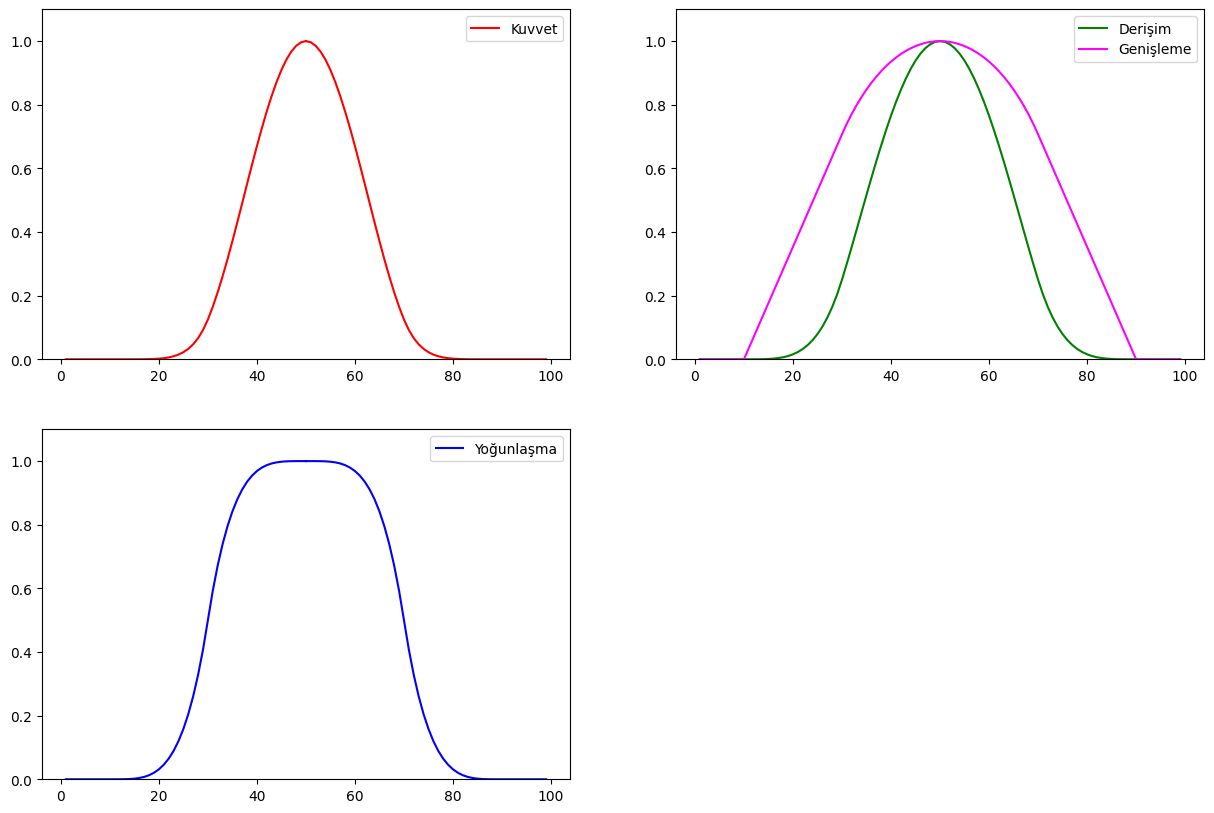

In [6]:
"""
Odev 4: Kuvvet, Derişim, Genişleme ve Yoğunlaşma fonksiyonlarin cizimi
"""
def kuvvet_islemi(uyelik_degeri, n):
    return pow(uyelik_degeri, n)
y_kuvvet_sol = []
y_kuvvet_sag = []

def derisim_islemi(uyelik_degeri):
    return pow(uyelik_degeri, 2)
y_derisim_sol = []
y_derisim_sag = []

def genisleme_islemi(uyelik_degeri):
    return pow(uyelik_degeri, 0.5)
y_genisleme_sol = []
y_genisleme_sag = []

def yogunlasma_islemi(uyelik_degeri):
    if uyelik_degeri <= 0.5:
        return 2 * pow(uyelik_degeri, 2)
    else:
        return 1 - 2 * pow(1 - uyelik_degeri, 2)
y_yogunlasma_sol = []
y_yogunlasma_sag = []

def islemleri_uygula_ve_ciz(b_genislik=40, c_orta_nokta=50):
    # Veri noktalarını
    x = np.arange(1, 100, 1)
    x_sol = x[x <= c_orta_nokta]
    x_sag = x[x >= c_orta_nokta]
    
    # Parametreleri
    a_sol = c_orta_nokta - b_genislik
    b_sol = c_orta_nokta - b_genislik/2
    c_sol = c_orta_nokta
    
    a_sag = c_orta_nokta
    b_sag = c_orta_nokta + b_genislik/2
    c_sag = c_orta_nokta + b_genislik
    
    # Sol
    for u in x_sol:
        sol, _ = uyelik_hesapla(a_sol, b_sol, c_sol, u)
        y_kuvvet_sol.append(kuvvet_islemi(sol, 3))
        y_derisim_sol.append(derisim_islemi(sol))
        y_genisleme_sol.append(genisleme_islemi(sol))
        y_yogunlasma_sol.append(yogunlasma_islemi(sol))
    
    # Sag
    for u in x_sag:
        _, sag = uyelik_hesapla(a_sag, b_sag, c_sag, u)
        y_kuvvet_sag.append(kuvvet_islemi(sag, 3))
        y_derisim_sag.append(derisim_islemi(sag))
        y_genisleme_sag.append(genisleme_islemi(sag))
        y_yogunlasma_sag.append(yogunlasma_islemi(sag))
    
    # Grafikleri çizdirme
    def plot(x, y, color, subplot ,label = None):
        plt.subplot(2, 2, subplot)
        plt.plot(x, y, color, label=label)
        plt.title(label)
        plt.ylim(0, 1.1)
        plt.legend()

    # Initialize the plot
    plt.figure(figsize=(15, 10))

    # Kuvvet PI fonksiyonu
    plot(x_sol, y_kuvvet_sol, 'red', 1, 'Kuvvet')
    plot(x_sag, y_kuvvet_sag, 'red', 1)
    
    # Derişim ve Genişleme
    plot(x_sol, y_derisim_sol, 'green', 2, 'Derişim')
    plot(x_sag, y_derisim_sag, 'green', 2)
    plot(x_sol, y_genisleme_sol, 'magenta', 2, 'Genişleme')
    plot(x_sag, y_genisleme_sag, 'magenta', 2)

    # Yoğunlaşma
    plot(x_sol, y_yogunlasma_sol, 'blue', 3, 'Yoğunlaşma')
    plot(x_sag, y_yogunlasma_sag, 'blue', 3)

    
islemleri_uygula_ve_ciz()